# System Recommendation
by Abdulloh Umar
### Projek 2 machine learning terapan

# 0. Import libraries and modules

Dibagian ini kita import semua libraries dan modeles yang dibutuhkan

In [1]:
from google.colab import files
import zipfile
import os
import pandas as pd
import numpy as np
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import precision_score, ndcg_score

# 1. Load Data

### 1.1 Upload dan ekstrak dataset dari Kaggle

Pertama kita harus mengunggah credential API (file kaggle.json) ke session Colab kita.
Setelah itu kita membuat direktori .kaggle di home directory, lalu kita salin file kaggle.json (berisi API key) ke direktori .kaggle dan kita ubah permission file kaggle.json agar hanya bisa dibaca oleh pemilik. Kemuadian kita download datasetnya dari kaggle

In [2]:
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download --force -d trolukovich/steam-games-complete-dataset

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/trolukovich/steam-games-complete-dataset
License(s): CC0-1.0
  0% 0.00/24.6M [00:00<?, ?B/s]
100% 24.6M/24.6M [00:00<00:00, 715MB/s]


### Ekstrak file zip

Hasil unduhan yang berupa file zip kita ekstrak

In [3]:
with zipfile.ZipFile('/content/steam-games-complete-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('steam-game-dataset')

### Load data ke DataFrame

Kita buka file yang sudah di ekstrak lalu kita cek 5 data awal.

In [4]:
df = pd.read_csv('/content/steam-game-dataset/steam_games.csv')

# 2. Data Understanding

### Cek value 5 data pertama
Kita lihat 5 data pertama dari dataset kita untuk melihat value seperti apa yang dipakai kolomnya

In [5]:
df.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


### Cek jumlah data

Cek jumlah data disetiap kolomnya dan melihat tipe datanya

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40833 entries, 0 to 40832
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       40833 non-null  object 
 1   types                     40831 non-null  object 
 2   name                      40817 non-null  object 
 3   desc_snippet              27612 non-null  object 
 4   recent_reviews            2706 non-null   object 
 5   all_reviews               28470 non-null  object 
 6   release_date              37654 non-null  object 
 7   developer                 40490 non-null  object 
 8   publisher                 35733 non-null  object 
 9   popular_tags              37888 non-null  object 
 10  game_details              40313 non-null  object 
 11  languages                 40797 non-null  object 
 12  achievements              12194 non-null  float64
 13  genre                     40395 non-null  object 
 14  game_d

### Cek missing values

Kita lihat missing value pada dataset

In [7]:
df.isnull().sum()

,0
url,0
types,2
name,16
desc_snippet,13221
recent_reviews,38127
all_reviews,12363
release_date,3179
developer,343
publisher,5100
popular_tags,2945


### Analisis nilai unik

Kita lihat berapa value unik (bukan duplikat) pada kolom name

In [8]:
print('Banyak nama unik di kolom name:', len(df.name.unique()))

Banyak nama unik di kolom name: 40750


Kita cek genre apa saja yang tersedia

In [9]:
print('Banyak jenis genre unik di kolom genre:', df.genre.unique())

Banyak jenis genre unik di kolom genre: ['Action' 'Action,Adventure,Massively Multiplayer'
 'Action,Adventure,Strategy' ...
 'Action,Free to Play,Massively Multiplayer,Strategy,Early Access'
 'Action,Free to Play,Indie,Massively Multiplayer,Racing,RPG,Simulation'
 'Casual,Free to Play,Indie,Massively Multiplayer,Simulation,Sports']


In [10]:
print('Banyak jenis genre unik di kolom genre:', len(df.genre.unique()))

Banyak jenis genre unik di kolom genre: 1769


Karena genre terlalu banyak sehingga tidak bisa ditampilkan semuanya, kita cek berapa jumlah genre yang tersedia dari jumlahnya

### Visualisasi distribusi genre dengan WordCloud

Untuk mempermudah melihat genre distribusi genre, kita menggunakan visualisasi dari `wordcloud`

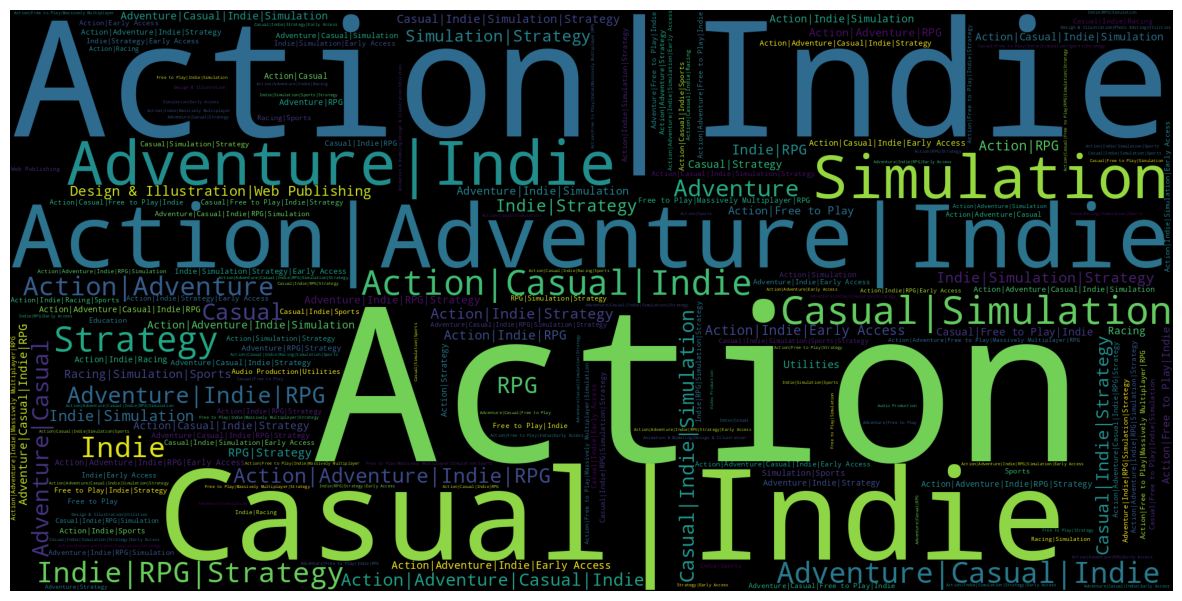

In [11]:
games_meta_data = df.copy()
games_meta_data['genre'] = games_meta_data['genre'].str.replace(',', '|') # Ganti pipeline untuk visualisasi yang lebih menarik
all_genres = games_meta_data['genre'].dropna().str.split(',') # Dihapus dulu biar NaN tidak bikin error
flat_genres = [genre.strip() for sublist in all_genres for genre in sublist]
wordcloud = WordCloud(width=2000, height=1000).generate_from_frequencies(Counter(flat_genres))

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 3. Data Preparation

### Feature Selection

Dataset ini memiliki banyak kolom yang sangat komplek, namun kita hanya akan mengambil 2 diantaranya yaitu name atau judul game dan genre agar sesuai dengan tujuan proyek ini yaitu merekomendasikan game berdasarkan genre game yang dipilih sebelumnya

In [12]:
games_meta_data = df[['name', 'genre']]
print("Shape sebelum cleaning:", games_meta_data.shape)
games_meta_data.head()

Shape sebelum cleaning: (40833, 2)


,name,genre
0,DOOM,Action
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Action,Adventure,Massively Multiplayer"
2,BATTLETECH,"Action,Adventure,Strategy"
3,DayZ,"Action,Adventure,Massively Multiplayer"
4,EVE Online,"Action,Free to Play,Massively Multiplayer,RPG,..."


### Data Cleaning

#### Handling Missing Values
Menghapus baris dengan nilai NaN di kolom yang dipakai:

In [13]:
games_meta_data = games_meta_data.dropna(subset=['name', 'genre'])

#### Handling Duplicate
Menghapus duplikat berdasarkan nama game:

In [14]:
data_cleaned = games_meta_data.drop_duplicates('name')
print("Shape setelah cleaning:", data_cleaned.shape)

Shape setelah cleaning: (40327, 2)


####  Normalisasi Genre
  - Mengganti pemisah koma (`,`) dengan pipe (`|`) untuk konsistensi
  - Menghapus spasi tidak perlu

In [15]:
data_cleaned['genre'] = data_cleaned['genre'].str.replace(',', '|').str.replace(' ', '')
data_cleaned.head()

<ipython-input-15-23fcaf979a46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['genre'] = data_cleaned['genre'].str.replace(',', '|').str.replace(' ', '')


,name,genre
0,DOOM,Action
1,PLAYERUNKNOWN'S BATTLEGROUNDS,Action|Adventure|MassivelyMultiplayer
2,BATTLETECH,Action|Adventure|Strategy
3,DayZ,Action|Adventure|MassivelyMultiplayer
4,EVE Online,Action|FreetoPlay|MassivelyMultiplayer|RPG|Str...


### Sampling data (10.000 baris)
Untuk menghemat resource, kita akan mengambil data dengan jumlah tertentu yang dinilai bisa mewakili keseluruhan. Disini kita hanya akan mengambil 10.000 data

In [16]:
games_data = data_cleaned.sample(10000, random_state=42).reset_index(drop=True)
print("Shape final:", games_data.shape)
games_data.head()

Shape final: (10000, 2)


,name,genre
0,Polyroll,Action|Indie
1,Fantasy Grounds - D&D Lost Laboratory of Kwalish,Indie|RPG|Strategy
2,Mahjong Challenge,Adventure|Casual|Indie|Sports
3,M.U.D. TV,Simulation|Strategy
4,Fog Of War Original Soundtrack,Action|Indie|MassivelyMultiplayer|RPG|Simulati...


### Ekstraksi Fitur dengan CountVectorizer
Mengubah data teks genre menjadi vektor numerik untuk pemrosesan model:

#### a. Tokenizer custom untuk split berdasarkan pipe ('|')
Proses ini memisahkan genre berdasarkan `|`, jadi genre yang terpisah dengan `|` akan dianggap genre yang berbeda

In [17]:
tf = CountVectorizer(tokenizer=lambda x: x.split('|'))
count_matrix = tf.fit_transform(games_data['genre'])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#### b. Cek hasil
Disini kita melihat kondisi genre setelah dipisah menjadi satuan

In [18]:
print("Contoh genre:", tf.get_feature_names_out())  # 10 genre pertama

Contoh genre: ['360video' 'accounting' 'action' 'adventure' 'animation&modeling'
 'audioproduction' 'casual' 'design&illustration' 'documentary'
 'earlyaccess' 'education' 'freetoplay' 'gamedevelopment' 'gore' 'htc'
 'indie' 'massivelymultiplayer' 'movie' 'nudity' 'photoediting' 'racing'
 'rpg' 'sexualcontent' 'short' 'simulation' 'softwaretraining' 'sports'
 'strategy' 'tutorial' 'utilities' 'videoproduction' 'violent'
 'webpublishing']


#### c. Mapping Game-to-Index
membuat pemetaan antara nama game dan index-nya di DataFrame `games_data` agar mudah dan cepat menemukan indeks baris (`row index`) dari game tertentu berdasarkan namanya, saat membuat sistem rekomendasi berbasis kemiripan (`similarity`).

In [19]:
indices = pd.Series(index=games_data['name'], data=games_data.index).drop_duplicates()

### Validasi Data

#### a. Cek nilai unik genre
Untuk melihat berapa jumlah genre setelah di pisah-pisah

In [20]:
print("Jumlah genre unik:", len(tf.get_feature_names_out()))

Jumlah genre unik: 33


#### b. Lihat contoh Game yang Tersedia
Untuk melihat game apa saja yang tersedia di 10.000 sampel yang terpilih

In [21]:
print("Contoh 20 game acak:")
print(games_data['name'].sample(20, random_state=1).tolist())

Contoh 20 game acak:
['Away From Beauty 色即是空', 'aMAZE ZER0', 'Drawing Path', 'Train Simulator: Western Lines of Scotland Route Add-On', 'Legend of the Skyfish', 'Ninja Way', 'The Last Night', 'Defiance 2050 - Starter Class Pack', 'Polyventure + OST', 'Zero Escape: The Nonary Games', 'Classic Fun Collection 5 in 1', 'Mantis Burn Racing® - Battle Cars', 'FourChords Guitar Karaoke - Demi Lovato Song Pack', 'Ys VIII: Lacrimosa of DANA - Free Set 1 / 無料お試しセット１', 'My Lovely Daughter - The Inquisitor', 'HIS - [XB-35] Julia Mackin Pack', 'Abstract Hell', 'Sylvio', 'Yametei', 'Dwarven Skykeep']


#### c. Cek Distribusi Genre
Melihat genre dengan penggunaan terbanyak

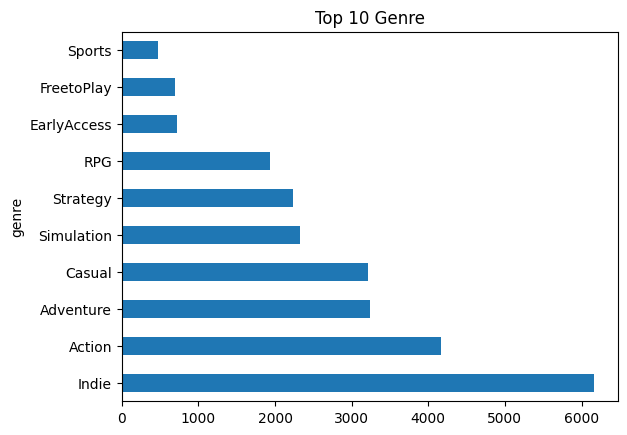

In [22]:
games_data['genre'].str.split('|').explode().value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Genre")
plt.show()

# 4. Modeling

##  Model 1 : Content-Based Filtering (Cosine Similarity on CountVectorizer)
Model ini bertujuan untuk membuat rekomendasi berdasarkan genre game yang dipilih sebelumnya

### Hitung cosine similarity
Cosine similarity menghitung tingkat kesamaan antar game dalam bentuk angka (0-1)



In [23]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

### Buat fungsi modelnya
fungsi berikut digunakan untuk membuat model yang bisa membuat rekomendasi berdasarkan genre game yang dipilih sebelumnya

In [24]:
def get_top_n_recommendations(game_name, n=5, similarity_threshold=0.1):
    try:
        # Dapatkan index game input
        idx = indices[game_name]

        # Hitung similarity score
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Urutkan dari score tertinggi
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Filter:
        # - Skip game itu sendiri (score=1)
        # - Hanya ambil yang melebihi threshold
        sim_scores = [
            (i, score) for i, score in sim_scores
            if i != idx and score >= similarity_threshold
        ][:n]  # Ambil Top-N

        # Format output
        recommendations = pd.DataFrame({
            'name': games_data.iloc[[i[0] for i in sim_scores]]['name'].values,
            'genre': games_data.iloc[[i[0] for i in sim_scores]]['genre'].values,
            'similarity_score': [f"{i[1]:.2f}" for i in sim_scores]
        })

        return recommendations.reset_index(drop=True)

    except KeyError:
        print(f"⚠️ Game '{game_name}' tidak ditemukan dalam database.")
        return pd.DataFrame()  # Return DataFrame kosong jika game tidak ada

### Cek kerja model
Disini kita lihat game apa saja yang dipilih model sebagai rekomendasi berdasarkan genre game yang dipilih sebelumnya

In [25]:
recommendations = get_top_n_recommendations("Drawing Path", n=20)
display(recommendations)

,name,genre,similarity_score
0,City Monsters,Casual|Indie|EarlyAccess,1.00
1,Xenochamber,Casual|Indie|EarlyAccess,1.00
2,Temple of Xiala,Casual|Indie|EarlyAccess,1.00
3,Millionaire Dancer,Casual|Indie|EarlyAccess,1.00
4,Tails,Casual|Indie|EarlyAccess,1.00
5,Charpi,Casual|Indie|EarlyAccess,1.00
6,Donut Distraction,Casual|Indie|EarlyAccess,1.00
7,Brainstorm Party,Casual|Indie|EarlyAccess,1.00
8,The Prison,Casual|Indie|EarlyAccess,1.00
9,Slide Ride Arcade,Casual|Indie|EarlyAccess,1.00


## Model 2 : Popularity-Based Recommendation
Model ini bertujuan untuk membuat rekomendasi berdasarkan genre yang paling populer di dataset `games_data`

### Menghitung ke populeran suatu genre
Disini kita hitung tingkat kepopuleran suatu genre

In [26]:
all_genres = '|'.join(games_data['genre']).split('|')
genre_counts = Counter(all_genres)
top_genres = [genre for genre, count in genre_counts.most_common(5)]

### Buat fungsi rekomendasinya
fungsi berikut digunakan untuk membuat model yang bisa membuat rekomendasi berdasarkan genre

In [27]:
def get_popular_recommendations(n=20):
    # Find games containing any of the top genres
    popular_games = games_data[
        games_data['genre'].str.contains('|'.join(top_genres))
    ].copy()

    # Count how many popular genres each game has
    popular_games['matched_popular_genres'] = popular_games['genre'].apply(
        lambda x: len(set(x.split('|')) & set(top_genres))
    )

    return popular_games.sort_values(
        'matched_popular_genres',
        ascending=False
    ).head(n)[['name', 'genre', 'matched_popular_genres']]

### Cek kerja model
Disini kita lihat game apa saja yang dipilih model sebagai rekomendasi berdasarkan genre yang paling populer

In [28]:
popular_rec = get_popular_recommendations()
display(popular_rec.head(10))

,name,genre,matched_popular_genres
1151,Myarcadegames Super Bundle,Action|Adventure|Casual|Indie|Simulation|Sport...,5
9461,Depth Hunter 2: Treasure Hunter,Action|Adventure|Casual|Indie|Simulation|Sports,5
1243,Mega Boogygames Bundle,Action|Adventure|Casual|Indie|Strategy|Simulat...,5
1280,IDALGAME Bundle COMPLETE,Action|Adventure|Indie|MassivelyMultiplayer|Si...,5
9402,Bound Up & Squirming!,Action|Adventure|Casual|Indie|Simulation,5
1410,The Murder Room VR,Action|Adventure|Casual|Indie|Simulation,5
1430,Armored Battle Crew - Supporter Pack,Action|Adventure|Casual|Indie|Simulation|Strategy,5
1425,Apollo4x,Action|Adventure|Casual|Indie|RPG|Simulation|S...,5
1471,ALL Games Narko Games,Violent|Gore|Action|Adventure|Indie|Casual|Rac...,5
1587,Naturallandscape - GuilinLandscape (自然景观系列-桂林山水),Action|Adventure|Casual|FreetoPlay|Indie|Racin...,5


# Evaluasi Model
Disini kita hitung tingkat presisi rekomendasi

### Evaluasi Model 1
Fungsi dibawah ini dikhususkan untuk menguji skor rekomendasi dari model 1 yaitu Content-Based Filtering (Cosine Similarity on CountVectorizer)

In [29]:
def evaluate_precision_content_based(target_game, recommended_df, k=10):
    # Ambil genre dari game target
    target_genres = set(games_data[games_data['name'] == target_game]['genre'].iloc[0].split('|'))

    # Ambil nama dari K rekomendasi teratas
    recommended_games = recommended_df['name'].head(k)

    # Hitung jumlah rekomendasi yang punya genre tumpang tindih dengan target
    match_count = 0
    for game in recommended_games:
        recommended_genres = set(games_data[games_data['name'] == game]['genre'].iloc[0].split('|'))
        if target_genres & recommended_genres:  # Cek irisan genre
            match_count += 1

    precision = match_count / k
    return precision

#### Tes Evaluasi
Lalu kita lihat skor evaluasinya

In [30]:
cb_recommendation = recommendations

# Evaluasi precision@10
cb_precision = evaluate_precision_content_based("Drawing Path", cb_recommendation, k=10)
print(f'Precision@10 (Content-Based): {cb_precision:.2f}')

Precision@10 (Content-Based): 1.00


### Evaluasi Model 2
Kode dibawah ini khusus untuk mengevaluasi model 2 yaitu Popularity-Based Recommendation

In [31]:
def evaluate_precision_popularity(top_genres, recommended_df, k=10):
    # Hitung seberapa banyak game rekomendasi mengandung genre terpopuler
    match_count = 0
    for game in recommended_df['name'].head(k):
        genres = set(games_data[games_data['name'] == game]['genre'].iloc[0].split('|'))
        if genres & set(top_genres):  # Cek apakah mengandung genre populer
            match_count += 1

    precision = match_count / k
    return precision

#### Tes Evaluasi
Lalu kita lihat skor evaluasinya

In [32]:
pop_precision = evaluate_precision_popularity(top_genres, popular_rec, k=10)
print(f'Precision@10 (Popularity-Based): {pop_precision:.2f}')

Precision@10 (Popularity-Based): 1.00
